In [5]:
import tensorflow as tf
tf.__version__


'2.3.1'

In [6]:
print("GPU Available",tf.test.is_gpu_available())

GPU Available False


In [7]:
!nvidia-smi

Wed May 26 16:41:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 456.55       Driver Version: 456.55       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce 940MX      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P0    N/A /  N/A |     56MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

In [8]:
A=tf.constant([[1,2],[3,4]])
B=tf.constant([[5,6],[7,8]])
C=tf.matmul(A,B)

In [9]:
print(C)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


In [10]:
#https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=mnist
#數據集

In [11]:
#載入資料 (將資料打散，放入train 與test 資料集)

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print('x_train='+str(x_train.shape))
print('y_train='+str(y_train.shape))

x_train=(60000, 28, 28)
y_train=(60000,)


In [12]:
#顯示資料內容
def printMartrixE(a): #顯示單一圖片的每一點資料
  rows=a.shape[0] #取得圖片高度
  cols=a.shape[1] #取得圖片寬度
  for i in range(0,rows): #處理每一列的每一點資料
    str1=""
    for j in range(0,cols): #處理同一行的每點資料
      str1=str1+("%3.0f"% a[i,j])
    print(str1)#輸出整排的數據資料
  print("")
printMartrixE(x_train[0]) #顯示第0筆的圖(內容)
print('y_train[0]='+str(y_train[0])) #顯示第0筆的答案

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [13]:
import matplotlib.pyplot as plt #圖形顯示的函式庫


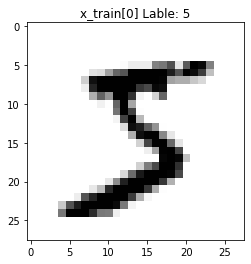

In [14]:
#顯示其中的圖形
num=0 #顯示第num筆的圖(內容)
plt.title('x_train[%d] Lable: %d'%(num,y_train[num]))#第num筆及答案
plt.imshow(x_train[num],cmap=plt.get_cmap('gray_r')) #用灰階的方法顯示該筆
plt.show() #秀出圖片

In [15]:
#顯示資料內容
def printMartrixE(a):
  rows=a.shape[0]
  cols=a.shape[1]
  for i in range(0,rows):
    str1=""
    for j in range(0,cols):
      str1=str1+("%3.0f"% a[i,j])
    print(str1)
  print("")
printMartrixE(x_train[2]) ###修改第三筆 0 1 "2"
print('y_train[0]='+str(y_train[2])) 

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 67232 39  0  0  0  0  0
  0  0  0  0 62 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0120180 39  0  0  0  0  0
  0  0  0  0126163  0  0  0  0  0  0  0  0  0  0  0  0  0  2153210 40  0  0  0  0  0
  0  0  0  0220163  0  0  0  0  0  0  0  0  0  0  0  0  0 27254162  0  0  0  0  0  0
  0  0  0  0222163  0  0  0  0  0  0  0  0  0  0  0  0  0183254125  0  0  0  0  0  0
  0  0  0 46245163  0  0  0  0  0  0  0  0  0  0  0  0  0198254 56  0  0  0  0  0  0
  0  0  0120254163  0  0  0  0  0  0  0  0  0  0  0  0 23231254 2

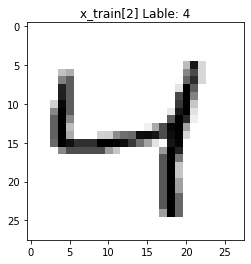

In [16]:
num=2 ####修改成2
plt.title('x_train[%d] Lable: %d'%(num,y_train[num]))
plt.imshow(x_train[num],cmap=plt.get_cmap('gray_r'))
plt.show()

In [17]:
import numpy as np

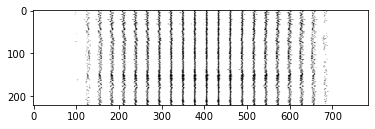

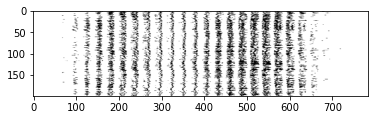

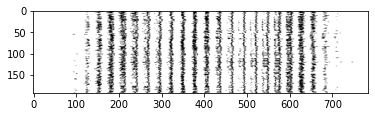

In [18]:

def display_mult_flat(start,stop,label): 
  images=x_train[start].reshape([1,784]) #784=28*28 將圖片變成一為陣列
  for i in range(start+1,stop): #尋找
    label2=int(y_train[i]) #取得該筆資料
    if label==label2: #判斷是否是我們要找的標籤
      images= np.concatenate((images,x_train[i].reshape([1,28*28])))
  plt.imshow(images,cmap=plt.get_cmap('gray_r')) #用灰階的方法繪製
  plt.show() #顯示圖片
display_mult_flat(0,2000,1) # 0-2000,如果是1顯示出來
display_mult_flat(0,2000,2) # 0-2000,如果是2顯示出來
display_mult_flat(0,2000,3) # 0-2000,如果是3顯示出來

In [19]:
from sklearn.datasets import load_digits

In [20]:
#影像的類別數目
num_classes=10

#輸入的手寫影像辨識度
img_rows,img_cols=28,28

print('x_train before reshape:',x_train.shape)
#將原始資料轉為正確的影像排列方式，輸出(60000,28,28)
dim=img_rows*img_cols*1 #784=28*28
x_train=x_train.reshape(x_train.shape[0],dim) #改變外型reshape
x_test=x_test.reshape(x_test.shape[0],dim)
print('x_train after reshape',x_train.shape) #輸出(60000,784)

x_train before reshape: (60000, 28, 28)
x_train after reshape (60000, 784)


In [21]:
#標準化輸入資料
print('x_train before div 255:',x_train[0][180:195]) #處理前的部分數據
x_train=x_train.astype('float32') #轉換為浮點數
x_test=x_test.astype('float32')
x_train /=255 #特徵值增強度
x_test /=255
print('x_train before div 255',x_train[0][180:195]) #處理後的部分數據


x_train before div 255: [170 253 253 253 253 253 225 172 253 242 195  64   0   0   0]
x_train before div 255 [0.6666667  0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
 0.88235295 0.6745098  0.99215686 0.9490196  0.7647059  0.2509804
 0.         0.         0.        ]


In [22]:
print('y_train shape:',y_train.shape) #輸出(6000,)
print(y_train[:10]) #前10個訓練樣本的標籤答案
#將數字轉為one-hot向量
category=10
y_train2=tf.keras.utils.to_categorical(y_train,category)#轉換為二進制類矩陣
y_test2=tf.keras.utils.to_categorical(y_test,category)
print("y_train2 to_categorical shape=",y_train2.shape) #輸出(60000,10)
print(y_train2[:10])#輸出前10筆


y_train shape: (60000,)
[5 0 4 1 9 2 1 3 1 4]
y_train2 to_categorical shape= (60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [23]:
###多層類神經MLP模型

In [24]:
# 建立模型
model = tf.keras.models.Sequential()  # 聲明順序層
# 定義「輸入層」加入模型， 輸入層dim=784 是輸入資料大小

# 定義輸出「隱藏層 」的神經元素數量
model.add(tf.keras.layers.Dense(units=10,  # 10 個神經元
    activation=tf.nn.relu,  #定義激勵函數為 relu
    input_dim=dim))  # 784=28*28 輸入層訓練特徵值784個
# 隱藏層
model.add(tf.keras.layers.Dense(units=10, # 10 個神經元
    activation=tf.nn.relu )) #定義激勵函數為 relu
# 輸出層
model.add(tf.keras.layers.Dense(units=category,
    activation=tf.nn.softmax ))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),  # 使用 Adam 移動 0.001 
    loss = tf.keras.losses.categorical_crossentropy, # 損失率使用稀疏分類交叉熵
    metrics = ['accuracy'])  # 模型在培訓和測試期間要評估的度量列表


In [25]:
#顯示模型
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 訓練模型
history=model.fit(x_train, y_train2,    #進行訓練的因和果的資料
          batch_size=1000,                              #設定每次訓練的筆數
          epochs=200,                       #設定訓練的次數，也就是機器學習的次數
          verbose=1)

Epoch 1/200
60/60 [==============================] - 0s 7ms/step - loss: 1.9127 - accuracy: 0.3024
Epoch 2/200
60/60 [==============================] - 0s 6ms/step - loss: 1.1407 - accuracy: 0.6596
Epoch 3/200
60/60 [==============================] - 0s 6ms/step - loss: 0.6795 - accuracy: 0.8253
Epoch 4/200
60/60 [==============================] - 0s 7ms/step - loss: 0.5252 - accuracy: 0.8541
Epoch 5/200
60/60 [==============================] - 1s 9ms/step - loss: 0.4537 - accuracy: 0.8706
Epoch 6/200
60/60 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8827
Epoch 7/200
60/60 [==============================] - 1s 9ms/step - loss: 0.3794 - accuracy: 0.8912
Epoch 8/200
60/60 [==============================] - 0s 8ms/step - loss: 0.3560 - accuracy: 0.8979
Epoch 9/200
60/60 [==============================] - 0s 8ms/step - loss: 0.3373 - accuracy: 0.9039
Epoch 10/200
60/60 [==============================] - 0s 7ms/step - loss: 0.3224 - accuracy: 0.9088
Epoch 11/

In [27]:

# 測試
score = model.evaluate(x_test, y_test2, batch_size = 128) # 計算測試正確率
print("score:", score) # 輸出測試正確率
predict = model.predict(x_test) # 取得每一個結果的機率
print("Ans:", np.argmax(predict[0]), np.argmax(predict[1]), np.argmax(predict[2]), np.argmax(predict[3])) # 取得預測答案1
predict2 = model.predict_classes(x_test[:10]) # 取得預測答案2
print("predict_classes:", predict2[:10]) # 輸出預測答案2
print("y_test", y_test[:10]) # 實際測試的結果

79/79 [==============================] - 0s 3ms/step - loss: 0.2190 - accuracy: 0.9417
score: [0.21902109682559967, 0.9416999816894531]
Ans: 7 2 1 0
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predict_classes: [7 2 1 0 4 1 4 9 6 9]
y_test [7 2 1 0 4 1 4 9 5 9]
